In [1]:
import mmcv
import data
import bbox
from meva.utils import image_utils
import matplotlib.pyplot as plt
import numpy as np

In [112]:
from importlib import reload
reload(image_utils)

<module 'meva.utils.image_utils' from '/home/tormod/Documents/APEC/meva/utils/image_utils.py'>

In [103]:
vid_folder = '/media/tormod/Den Lille/Thesis/videos'
anno_folder = '/media/tormod/Den Lille/Thesis/annotations'
est_folder = '/home/tormod/ucph-erda-home/mmpose_anno'
#feature_folder = '/media/tormod/Den Lille/Thesis/hmr_features'
feature_folder = '/home/tormod/ucph-erda-home/hmr_features'


c = data.ClimbingDataset(vid_folder, anno_folder, est_folder, 'all', feat_folder=feature_folder)

In [109]:
labels.max(axis=1).shape

(7609, 3)

In [348]:
name = 'IMG_2139'
threshold = 0.2
rolling_avg = 30
labels = np.load(f'{c.est_folder}/{name}.npy')
vid_shape = c.vids[data.stripped_names.index(name)].resolution
labels[:,:,0] = np.clip(labels[:,:,0], 0, vid_shape[0])
labels[:,:,1] = np.clip(labels[:,:,1], 0, vid_shape[1])

labels[labels[:,:,-1] <= threshold] = np.zeros(3)

bboxes = image_utils.get_bbox_from_kp2d(labels)

/home/tormod/Documents/APEC/meva/utils/image_utils.py:365: RuntimeWarning: invalid value encountered in double_scalars
  w = h = h * 1.1


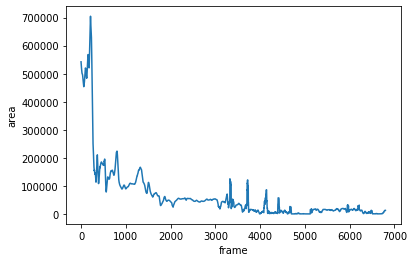

In [349]:
areas = bboxes[:,2]**2
plt.plot(np.convolve(areas, np.ones(rolling_avg)/rolling_avg, mode='valid'))
plt.ylabel('area')
plt.xlabel('frame')
plt.savefig(f'area-{threshold}.png', bbox_inches='tight', dpi=100)

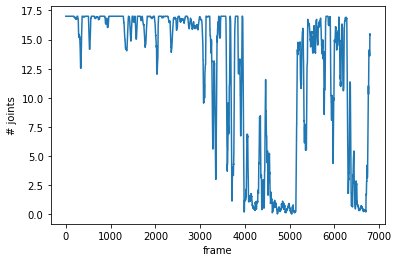

In [350]:
num_labels = (labels[:,:,-1] > 0.0).sum(axis=1)
plt.plot(np.convolve(num_labels, np.ones(rolling_avg)/rolling_avg, mode='valid'))
plt.ylabel('# joints')
plt.xlabel('frame')
plt.savefig(f'no-joints-{threshold}.png', bbox_inches='tight', dpi=100)